In [1]:
import numpy as np
import data_reader as dr
import matplotlib.pyplot as plt
import toolkit as tk
from scipy.optimize import fsolve

%matplotlib inline

In [2]:
#Need to include this in the toolkit package

def read_time(data):
    time = []
    for i in range(len(data)):
        t1 = str(data['time1'][i])
        t2 = str(data['time2'][i])
        h = np.float(t2[2:4])
        m = np.float(t2[5:7])
        s = np.float(t2[8:-1])
        y = np.float(t1[2:6])
        M = np.float(t1[7:9])
        d = np.float(t1[10:12])
        time.append(s + 60*m + 3600 * h + 24*60*60*d + 31*24*60*60*M+365*24*60*60*(y - 2017))
    return np.array(time)

In [43]:
ab2 = dr.sample(r"C:\Users\Scott Reid\Documents\Masters\Research\Data\TbTe3_AB2")

In [4]:
seq_pt = r"C:\Users\Scott Reid\Documents\Masters\Research\Data\TbTe3_AB2_Log\20180202-TbTe3-AB_d500nm_log.dat"
dt = np.dtype([('time', '<f8'), ('T', '<f8'), ('B', '<f8')])
seq = np.genfromtxt(seq_pt, skip_header=19, delimiter=',', usecols = (1,2,3), dtype = dt)

#relative time:
T_MPMS0 = seq['time'][0]
seq['time'] = seq['time'] - seq['time'][0]

d2, _ = ab2.get_dat(2)
T_Janis0 = read_time(d2)[0] + 200

In [5]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [6]:
def get_B_T(data, seq=seq, TJ = T_Janis0):
    t = read_time(data) - TJ
    T = []
    B = []
    for i in range(len(t)):
        j = np.argmin(np.fabs(seq['time'] - t[i]))
        T.append(seq['T'][j])
        B.append(seq['B'][j])
    return np.array(B), np.array(T)

# Magnetoresistance Plots

## 300K

In [7]:
#Magnetoresistance at 300K, 6mA offset current
d, nam = ab2.get_dat(3)
B, T = get_B_T(d)
time = read_time(d) - T_Janis0

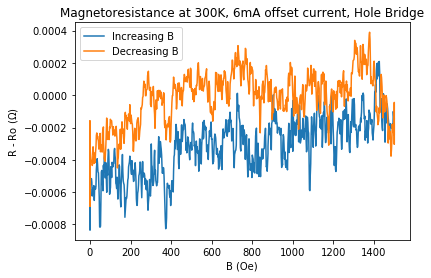

In [8]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], (d['hvx']/d['ia'])[0:max_b + 1], label = 'Increasing B')
plt.plot(B[max_b + 1:], (d['hvx']/d['ia'])[max_b + 1:], label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 300K, 6mA offset current, Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

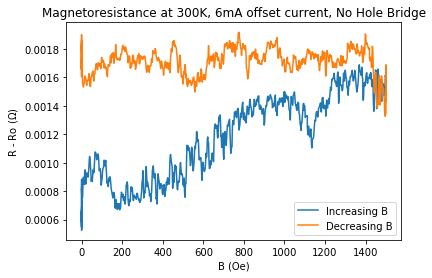

In [9]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], (d['nvx']/d['ia'])[0:max_b + 1], label = 'Increasing B')
plt.plot(B[max_b + 1:], (d['nvx']/d['ia'])[max_b + 1:], label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 300K, 6mA offset current, No Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

## 250K

In [10]:
#Magnetoresistance at 250K, 5mA offset current
d, nam = ab2.get_dat(9)
B, T = get_B_T(d)
time = read_time(d) - T_Janis0

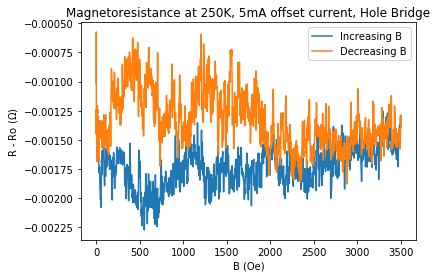

In [11]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], smooth((d['hvx']/d['ia'])[0:max_b + 1], 1), label = 'Increasing B')
plt.plot(B[max_b + 1:], smooth((d['hvx']/d['ia'])[max_b + 1:], 1), label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 250K, 5mA offset current, Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

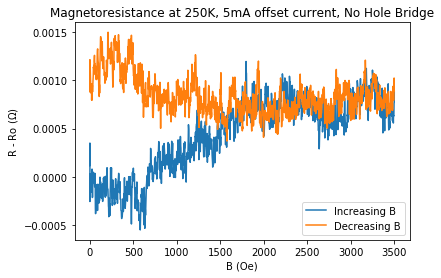

In [12]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], (d['nvx']/d['ia'])[0:max_b + 1], label = 'Increasing B')
plt.plot(B[max_b + 1:], (d['nvx']/d['ia'])[max_b + 1:], label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 250K, 5mA offset current, No Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

In [13]:
#Magnetoresistance at 250K, 0mA offset current
d, nam = ab2.get_dat(11)
B, T = get_B_T(d)
time = read_time(d) - T_Janis0

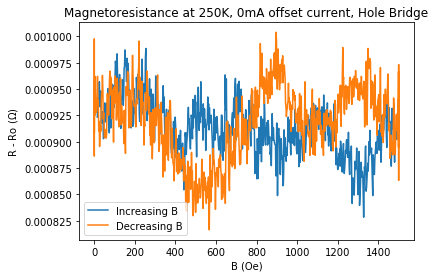

In [14]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], smooth((d['hvx']/d['ia'])[0:max_b + 1], 1), label = 'Increasing B')
plt.plot(B[max_b + 1:], smooth((d['hvx']/d['ia'])[max_b + 1:], 1), label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 250K, 0mA offset current, Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

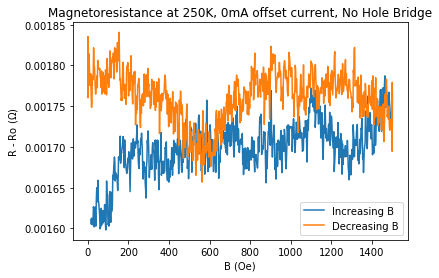

In [15]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], (d['nvx']/d['ia'])[0:max_b + 1], label = 'Increasing B')
plt.plot(B[max_b + 1:], (d['nvx']/d['ia'])[max_b + 1:], label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 250K, 0mA offset current, No Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

## 200K

In [16]:
#Magnetoresistance at 200K, 10mA offset current
d, nam = ab2.get_dat(15)
B, T = get_B_T(d)
time = read_time(d) - T_Janis0

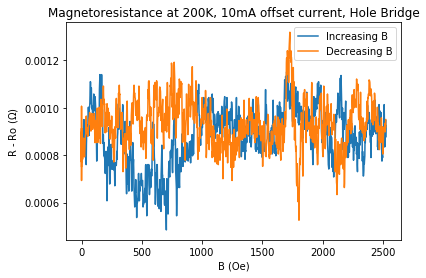

In [17]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], smooth((d['hvx']/d['ia'])[0:max_b + 1], 1), label = 'Increasing B')
plt.plot(B[max_b + 1:], smooth((d['hvx']/d['ia'])[max_b + 1:], 1), label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 200K, 10mA offset current, Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

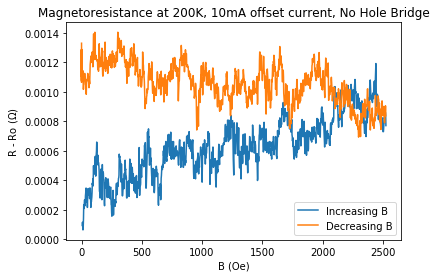

In [18]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], (d['nvx']/d['ia'])[0:max_b + 1], label = 'Increasing B')
plt.plot(B[max_b + 1:], (d['nvx']/d['ia'])[max_b + 1:], label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 200K, 10mA offset current, No Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

## 150K

In [19]:
#Magnetoresistance at 200K, 10mA offset current
d, nam = ab2.get_dat(19)
B, T = get_B_T(d)
time = read_time(d) - T_Janis0

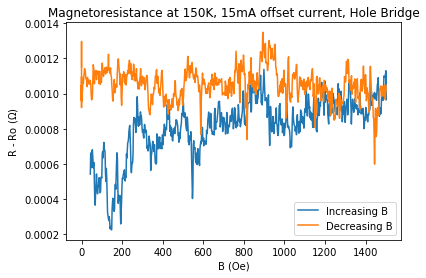

In [20]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], smooth((d['hvx']/d['ia'])[0:max_b + 1], 1), label = 'Increasing B')
plt.plot(B[max_b + 1:], smooth((d['hvx']/d['ia'])[max_b + 1:], 1), label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 150K, 15mA offset current, Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

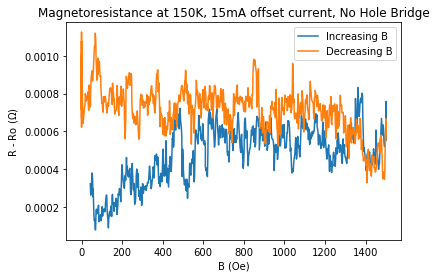

In [21]:
max_b = np.argmax(B)
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(B[0:max_b + 1], (d['nvx']/d['ia'])[0:max_b + 1], label = 'Increasing B')
plt.plot(B[max_b + 1:], (d['nvx']/d['ia'])[max_b + 1:], label = 'Decreasing B')
plt.legend()
plt.title("Magnetoresistance at 150K, 15mA offset current, No Hole Bridge")
plt.xlabel('B (Oe)')
plt.ylabel(r'R - Ro ($\Omega$)')

# Interesting result: Asymmetry in sliding at 200K

In [22]:
cut0 = np.fabs(d14['io']) < 0.005
po = np.polyfit(d14['io'][cut0], d14['nvx'][cut0], 2)
pos = d14['io'] > 0
neg = d14['io'] < 0
plt.plot(np.fabs(d14['io'])[pos], (d14['nvx'] - po[0]*d14['io']*d14['io'])[pos], 'r', label = 'positive I')
plt.plot(np.fabs(d14['io'])[neg], (d14['nvx'] - po[0]*d14['io']*d14['io'])[neg], 'b', label = 'negative I')
plt.title('No hole sliding, 200K')
plt.legend()

NameError: name 'd14' is not defined

In [ ]:
cut0 = np.fabs(d14['io']) < 0.005
p1 = np.polyfit(d14['io'][cut0], d14['hvx'][cut0], 2)
plt.plot(np.fabs(d14['io'])[pos], (d14['hvx'] - p1[0]*d14['io']*d14['io'])[pos], 'r', label = 'positive I')
plt.plot(np.fabs(d14['io'])[neg], (d14['hvx'] - p1[0]*d14['io']*d14['io'])[neg], 'b', label = 'negative I')
plt.title('Hole sliding, 200K')
plt.legend()

In [ ]:
plt.plot(d14['io'], (d14['nvx'] - po[0]*d14['io']*d14['io'])/d14['nvx'][d14['io'] == 0], label = 'No Hole')
plt.plot(d14['io'], (d14['hvx'] - p1[0]*d14['io']*d14['io'])/d14['hvx'][d14['io'] == 0], label = 'Hole')
plt.title('Joule Heating Subtracted, 200K')
plt.legend()

In [ ]:
d18, nam = ab2.get_dat(18)
print(nam)

In [ ]:
cut = np.fabs(d18['io']) < 0.006
ph = np.polyfit(d18['io'][cut], d18['hvx'][cut], 2)
plt.plot(d18['io'], d18['hvx'] - ph[0] * d18['io'] * d18['io'], label = 'hole')
pn = np.polyfit(d18['io'][cut], d18['nvx'][cut], 2)
plt.plot(d18['io'], d18['nvx'] - pn[0] * d18['io'] * d18['io'], label = 'no hole')
plt.title('150 K')
plt.legend()

In [ ]:
pos = d18['io'] > 0
neg = d18['io'] < 0
plt.plot(np.fabs(d18['io'])[pos], (d18['nvx'] - pn[0]*d18['io']*d18['io'])[pos], 'r', label = 'positive I')
plt.plot(np.fabs(d18['io'])[neg], (d18['nvx'] - pn[0]*d18['io']*d18['io'])[neg], 'b', label = 'negative I')
plt.title('No hole sliding, 150K')
plt.legend()

In [ ]:
plt.plot(np.fabs(d18['io'])[pos], (d18['hvx'] - ph[0]*d18['io']*d18['io'])[pos], 'r', label = 'positive I')
plt.plot(np.fabs(d18['io'])[neg], (d18['hvx'] - ph[0]*d18['io']*d18['io'])[neg], 'b', label = 'negative I')
plt.title('Hole sliding, 150K')
plt.legend()

In [ ]:
d20, nam = ab2.get_dat(20)
print(nam)

In [ ]:
plt.plot(d20['nvx'])

In [ ]:
d21, nam = ab2.get_dat(21)
print(nam)

In [ ]:
plt.plot(d21['io'], d21['hvx']/d21['ia'])

# Sample Death???

# Sliding Anisotropy -- Correlation length related?

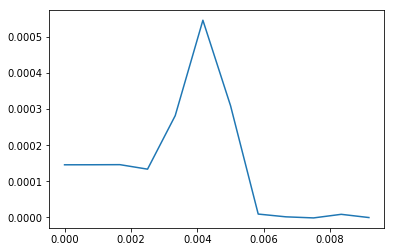

In [232]:
d, nam = ab2.get_dat(21)
plt.plot(d['io'], d['hvx'])

In [23]:
s300, nam = ab2.get_dat(1) #300K sliding
s250_0, nam = ab2.get_dat(7) #250K sliding
s250_1, nam = ab2.get_dat(8) #250K sliding
s200, nam = ab2.get_dat(14) #200K sliding
s150, nam = ab2.get_dat(18) #150K sliding

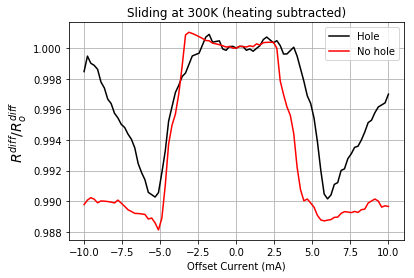

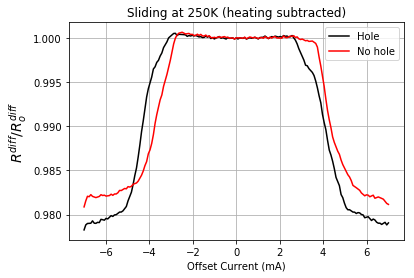

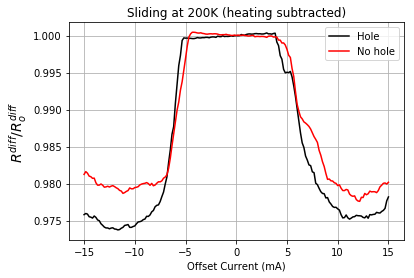

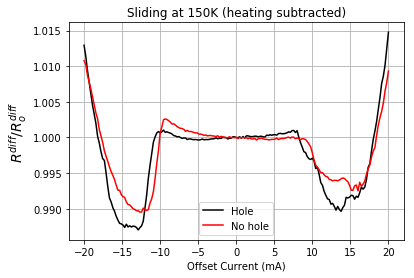

In [24]:
i = 0
temps = ['300', '250', '200', '150']
for d in [s300, s250_1, s200, s150]:
    t = temps[i]
    i = i+1
    cut = np.fabs(d['io']) < 0.003
    h_fit = np.polyfit(d['io'][cut], d['hvx'][cut], 2)
    n_fit = np.polyfit(d['io'][cut], d['nvx'][cut], 2)
    hr_corr = (d['hvx'] - h_fit[0] * d['io'] * d['io'])/d['ia']
    nr_corr = (d['nvx'] - n_fit[0] * d['io'] * d['io'])/d['ia']
    plt.subplots(figsize = (6,4))
    plt.plot(d['io']*1e3, hr_corr/hr_corr[d['io'] == 0], 'k', label = 'Hole')
    plt.plot(d['io']*1e3, nr_corr/nr_corr[d['io'] == 0], 'r', label = 'No hole')
    plt.legend()
    plt.grid(True)
    plt.title('Sliding at ' + t + 'K (heating subtracted)')
    plt.xlabel('Offset Current (mA)')
    plt.ylabel(r'$R^{diff}/R^{diff}_o$', fontsize = 14)

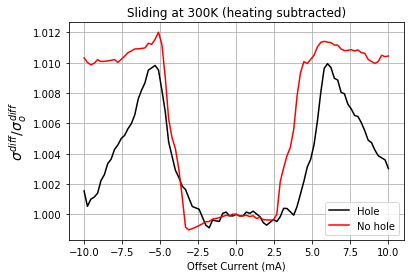

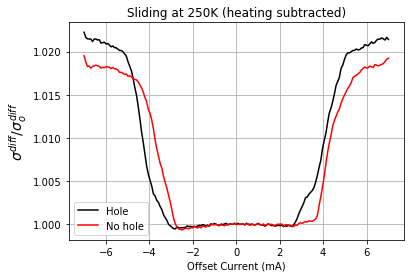

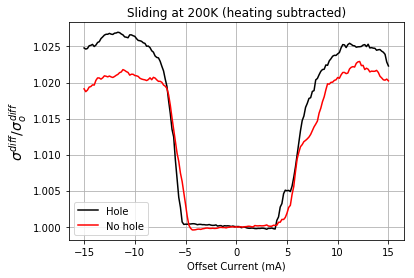

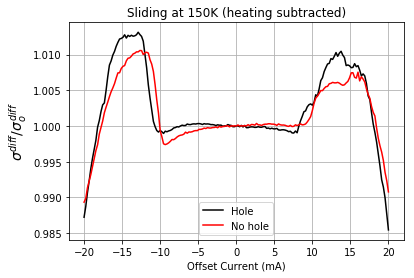

In [27]:
i = 0
temps = ['300', '250', '200', '150']
for d in [s300, s250_1, s200, s150]:
    t = temps[i]
    i = i+1
    cut = np.fabs(d['io']) < 0.003
    h_fit = np.polyfit(d['io'][cut], d['hvx'][cut], 2)
    n_fit = np.polyfit(d['io'][cut], d['nvx'][cut], 2)
    hr_corr = (d['hvx'] - h_fit[0] * d['io'] * d['io'])/d['ia']
    nr_corr = (d['nvx'] - n_fit[0] * d['io'] * d['io'])/d['ia']
    plt.subplots(figsize = (6,4))
    plt.plot(d['io']*1e3, 1/(hr_corr/hr_corr[d['io'] == 0]), 'k', label = 'Hole')
    plt.plot(d['io']*1e3, 1/(nr_corr/nr_corr[d['io'] == 0]), 'r', label = 'No hole')
    plt.legend()
    plt.grid(True)
    plt.title('Sliding at ' + t + 'K (heating subtracted)')
    plt.xlabel('Offset Current (mA)')
    plt.ylabel(r'$\sigma^{diff}/\sigma^{diff}_o$', fontsize = 14)

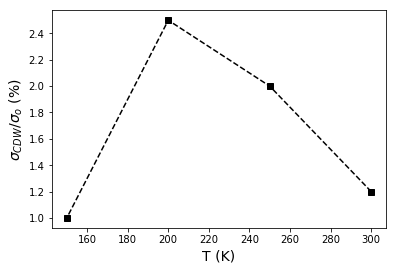

In [42]:
plt.plot([300, 250, 200, 150], [1.2, 2.0, 2.5, 1.0], 'ks--')
plt.xlabel('T (K)', fontsize = 14)
plt.ylabel(r'$\sigma_{CDW}/\sigma_{o}$ (%)', fontsize = 14)

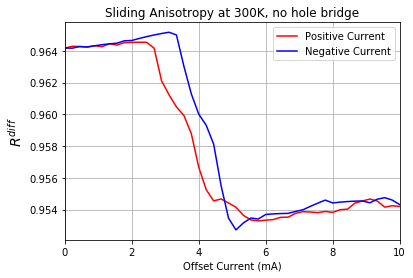

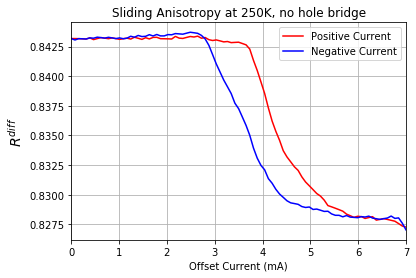

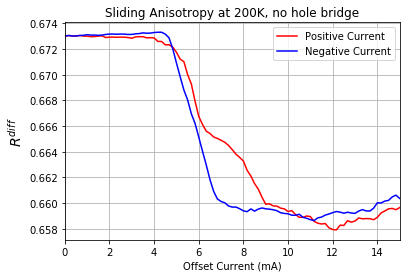

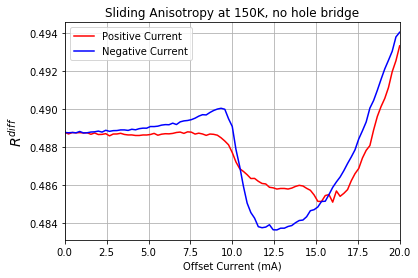

In [25]:
i = 0
temps = ['300', '250', '200', '150']
for d in [s300, s250_1, s200, s150]:
    t = temps[i]
    i = i+1
    cut = np.fabs(d['io']) < 0.003
    h_fit = np.polyfit(d['io'][cut], d['hvx'][cut], 2)
    n_fit = np.polyfit(d['io'][cut], d['nvx'][cut], 2)
    hr_corr = (d['hvx'] - h_fit[0] * d['io'] * d['io'])/d['ia']
    nr_corr = (d['nvx'] - n_fit[0] * d['io'] * d['io'])/d['ia']
    
    plt.subplots(figsize = (6,4))
    pos = d['io'] >= 0
    neg = d['io'] <= 0
    plt.plot(d['io'][pos]*1e3, nr_corr[pos], 'r', label = 'Positive Current')
    plt.plot(-d['io'][neg]*1e3, nr_corr[neg], 'b', label = 'Negative Current')
    plt.legend()
    plt.grid(True)
    plt.xlim([0, np.max(d['io']*1e3)])
    plt.title('Sliding Anisotropy at ' + t + 'K, no hole bridge')
    plt.ylabel(r'$R^{diff}$', fontsize = 14)
    plt.xlabel('Offset Current (mA)')

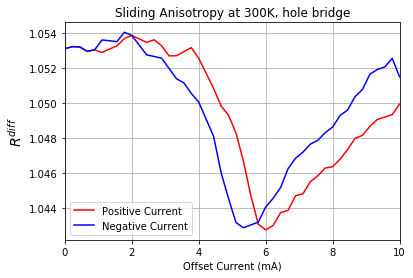

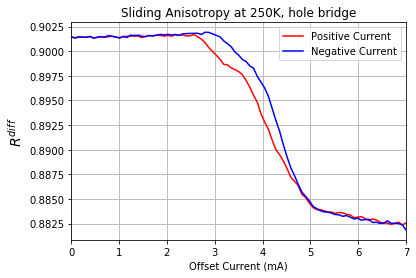

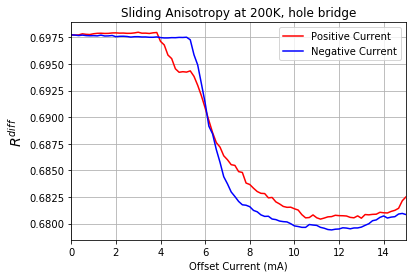

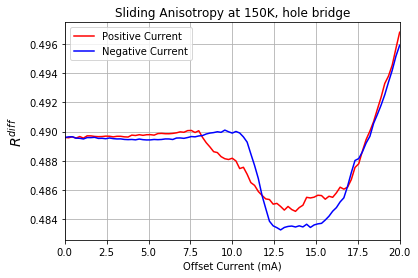

In [199]:
i = 0
temps = ['300', '250', '200', '150']
for d in [s300, s250_1, s200, s150]:
    t = temps[i]
    i = i+1
    cut = np.fabs(d['io']) < 0.003
    h_fit = np.polyfit(d['io'][cut], d['hvx'][cut], 2)
    n_fit = np.polyfit(d['io'][cut], d['nvx'][cut], 2)
    hr_corr = (d['hvx'] - h_fit[0] * d['io'] * d['io'])/d['ia']
    nr_corr = (d['nvx'] - n_fit[0] * d['io'] * d['io'])/d['ia']
    
    plt.subplots(figsize = (6,4))
    pos = d['io'] >= 0
    neg = d['io'] <= 0
    plt.plot(d['io'][pos]*1e3, hr_corr[pos], 'r', label = 'Positive Current')
    plt.plot(-d['io'][neg]*1e3, hr_corr[neg], 'b', label = 'Negative Current')
    plt.legend()
    plt.grid(True)
    plt.xlim([0, np.max(d['io']*1e3)])
    plt.title('Sliding Anisotropy at ' + t + 'K, hole bridge')
    plt.ylabel(r'$R^{diff}$', fontsize = 14)
    plt.xlabel('Offset Current (mA)')

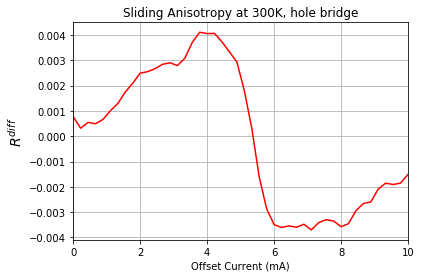

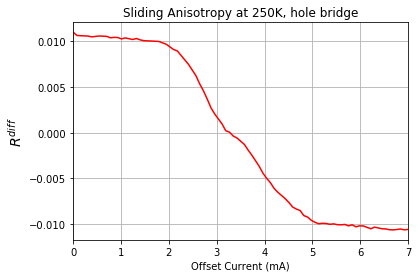

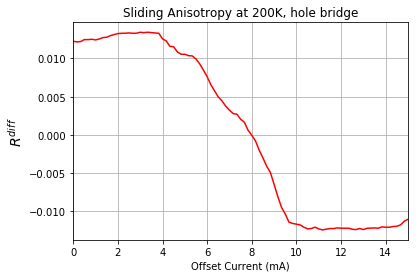

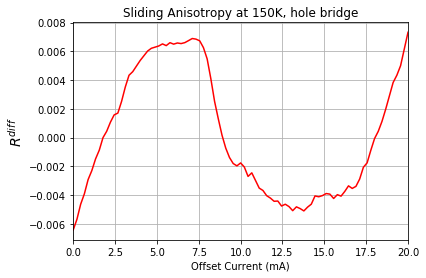

In [26]:
i = 0
temps = ['300', '250', '200', '150']
for d in [s300, s250_1, s200, s150]:
    t = temps[i]
    i = i+1
    cut = np.fabs(d['io']) < 0.003
    h_fit = np.polyfit(d['io'][cut], d['hvx'][cut], 2)
    n_fit = np.polyfit(d['io'][cut], d['nvx'][cut], 2)
    hr_corr = (d['hvx'] - h_fit[0] * d['io'] * d['io'])/d['ia']
    nr_corr = (d['nvx'] - n_fit[0] * d['io'] * d['io'])/d['ia']
    
    plt.subplots(figsize = (6,4))
    pos = d['io'] >= 0
    neg = d['io'] <= 0
    plt.plot(d['io'][pos]*1e3, (hr_corr[pos]-hr_corr[neg])/(hr_corr[pos]+hr_corr[neg]), 'r')
    plt.grid(True)
    plt.xlim([0, np.max(d['io']*1e3)])
    plt.title('Sliding Anisotropy at ' + t + 'K, hole bridge')
    plt.ylabel(r'$R^{diff}$', fontsize = 14)
    plt.xlabel('Offset Current (mA)')